# CS7641 Machine Learning

### Assignment 3 - Unsupervised Learning
### Author: Vivek Agrawal


### References



## 1. Data Sets Used
First step in the process is to load all the datasets
1. https://archive.ics.uci.edu/ml/datasets/Census+Income
1. https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
#Imports
import pandas as pd
import numpy as np
import itertools 
from scipy.stats import kurtosis

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


import matplotlib.pyplot as plt
from time import clock
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import homogeneity_score, completeness_score, homogeneity_completeness_v_measure
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.base import TransformerMixin,BaseEstimator
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import scale


# Data Cleanup

In [2]:
def gtid():
    return 903471711

def author(self):
    return 'vagrawal63'	

  
def get_wine_data(file_name = "winequality.csv"):
    data = pd.read_csv(file_name)

    
    #convert class which is Y in this case to binary classes
    def func(x):
        if(x > 6):
            return 1
        else:
            return 0
    data['quality'] = data['quality'].apply(func)
    
    result = data['quality']
    del data['quality']
    print("Original: " + str(data.shape))
    data = scale(data)
    return data, result


#randomize using GT ID
np.random.seed(gtid())
#Read Data File
wine_data, result = get_wine_data()
print("Cleaned: " + str(wine_data.shape))
#print(wine_data)

Original: (5011, 12)
Cleaned: (5011, 12)


In [3]:
print("Split data")
#split data
X_train, X_test, Y_train, Y_test = train_test_split(wine_data, result, test_size  = 0.2)
print("X_train: " + str(X_train.shape))

Split data
X_train: (4008, 12)


## Part 1: K Means and GMM (Expectation Maximization)

In [4]:
print('Part 1: Start Clustering on Wine Data ==')
clusters =  [1,2,3,4,5,6,7,8,9,10,11]


SSE = defaultdict(dict)
BIC = defaultdict(dict)
hScore = defaultdict(dict)
cScore = defaultdict(dict)
AMI = defaultdict(dict)
VMeasure = defaultdict(dict)
km = KMeans(random_state=5)
gmm = GaussianMixture(random_state = 100)

st = clock()
for k in clusters:
    km.set_params(n_clusters=k)
    gmm.set_params(n_components=k)
    
    #km = km.fit(X_train)
    km.fit(X_train)
    gmm.fit(X_train)

    SSE[k]['WineInertia'] = (km.inertia_)
    BIC[k]['WineBIC'] = gmm.bic(X_train)
    
    hScore[k]['KM'] = homogeneity_score(Y_train,km.predict(X_train))
    hScore[k]['GMM'] = homogeneity_score(Y_train,gmm.predict(X_train))
    
    cScore[k]['KM'] = completeness_score(Y_train,km.predict(X_train))
    cScore[k]['GMM'] = completeness_score(Y_train,gmm.predict(X_train))
    
    AMI[k]['KM'] = ami(Y_train,km.predict(X_train))
    AMI[k]['GMM'] = ami(Y_train,gmm.predict(X_train))
    
    
    a,b,vm = homogeneity_completeness_v_measure(Y_train,km.predict(X_train))
    VMeasure[k]['KM'] = vm
    
    a,b,vm = homogeneity_completeness_v_measure(Y_train,gmm.predict(X_train))
    VMeasure[k]['GMM'] = vm
    #print(k, clock()-st)
    
    
SSE = (pd.DataFrame(SSE)).T
BIC = pd.DataFrame(BIC).T

hScore = pd.DataFrame(hScore).T 
cScore = pd.DataFrame(cScore).T
AMI = pd.DataFrame(AMI).T
VMeasure = pd.DataFrame(VMeasure).T

print("Writing files now .. ")
SSE.to_csv('./P1/WineClusterKMeans.csv')
BIC.to_csv('./P1/WineClusterGMM.csv')

hScore.to_csv('./P1/WineHScore.csv')
cScore.to_csv('./P1/WineCScore.csv')
AMI.to_csv('./P1/WineAMI.csv')
VMeasure.to_csv('./P1/WineVMeasure.csv')
print("Finished writing files")

Part 1: Start Clustering on Wine Data ==
Writing files now .. 
Finished writing files


In [5]:
def plot_clustering_charts():
   
    KNNCluster = pd.read_csv("./P1/WineClusterKMeans.csv", header='infer')
    GMMCluster = pd.read_csv("./P1/WineClusterGMM.csv", header='infer')

    HScore = pd.read_csv("./P1/WineHScore.csv", header = 'infer')
    CScore = pd.read_csv("./P1/WineCScore.csv", header = 'infer')
    AMI = pd.read_csv("./P1/WineAMI.csv", header = 'infer')

    VMeasure = pd.read_csv("./P1/WineVMeasure.csv", header = 'infer')

    x_data = HScore['Unnamed: 0']
    plt.close()
    plt.plot(x_data, KNNCluster['WineInertia'], 'bx-', color = 'blue', linewidth = 1, label = "Number of Clusters" )
    plt.axvline(x = 5, linestyle = "--", linewidth = 1, color = "k", label = "Optimal Clusters = 5")
    plt.legend(loc = 'best')
    plt.title("Figure 1.4: KMeans Elbow Method\nWine Dataset")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Distances");
    plt.show()
    plt.close()

   
    plt.plot(x_data, HScore['KM'], color = 'orange',  label = "Homogenity" )
    plt.plot(x_data, CScore['KM'], color = 'blue',  label = "Completeness" )
    plt.plot(x_data, AMI['KM'], color = 'green',  label = "Adjusted MI" )
    plt.plot(x_data, VMeasure['KM'], color = 'red',  label = "V Measure" )
    plt.axvline(x = 5 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Clusters = 5")

    plt.legend(loc = 'upper right')
    plt.title("Figure 1.5: KMeans Performance Evaluation\nWine Dataset")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Score");
    plt.show()
    plt.close()

    plt.plot(x_data, GMMCluster['WineBIC'], 'bx-', color = 'blue', linewidth = 1, label = "Number of Clusters" )
    plt.axvline(x = 8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Clusters = 8")
    plt.legend(loc = 'best')
    plt.title("Figure 2.5: Expectation Maximization BIC\nWine Dataset")
    plt.xlabel("Number of Clusters")
    plt.ylabel("BIC");
    plt.show()
    plt.close()

    plt.plot(x_data, HScore['GMM'], color = 'orange',  label = "Homogenity" )
    plt.plot(x_data, CScore['GMM'], color = 'blue',  label = "Completeness" )
    plt.plot(x_data, AMI['GMM'], color = 'green',  label = "Adjusted MI" )
    plt.plot(x_data, VMeasure['GMM'], color = 'red',  label = "V Measure" )
    plt.axvline(x = 8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Clusters = 8")
    plt.legend(loc = 'upper right')
    plt.title("Figure 2.4: Expectation Maximization Performance Evaluation\nWine Dataset")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Score");
    plt.show()
    plt.close()

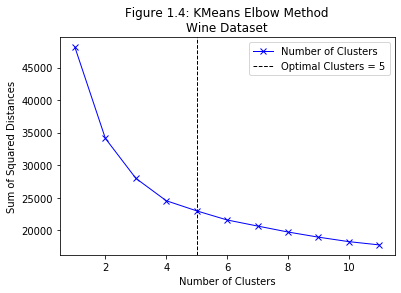

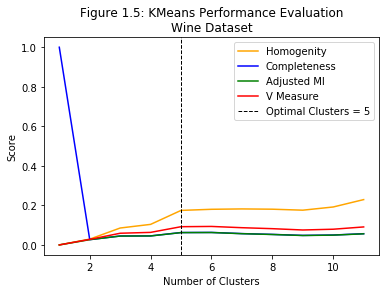

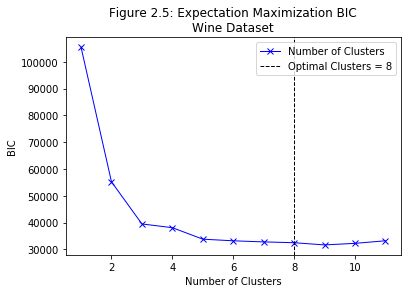

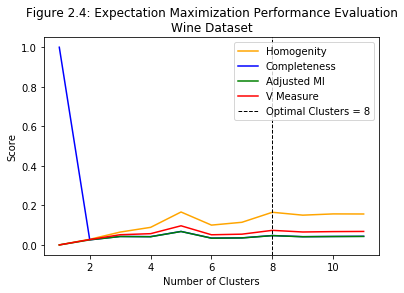

In [6]:
plot_clustering_charts()

In [7]:
def KM_Silhoutte(X, y, title= ""):
    if (title == ""):
        title = "Figure 1.6: KMeans Clustering Silhoutte Analysis\nWine Dataset "
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(12,5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        #ax1.set_title("Figure 1c: kMeans silhouette plot (Cancer Dataset)")
        ax1.set_xlabel("Silhouette coefficient values")
        #ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")

        #ax1.set_yticks([])  # Clear the yaxis labels / ticks
        #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        #ax2.set_title("The visualization of the clustered data.")
        #ax2.set_xlabel("Feature space for the 1st feature")
        #ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((title+
                      "(No of Clusters = %d)" % n_clusters),
                     fontsize=14)

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3202602067739626
For n_clusters = 3 The average silhouette_score is : 0.2614816936729334
For n_clusters = 4 The average silhouette_score is : 0.264603461431056
For n_clusters = 5 The average silhouette_score is : 0.2008077910530081
For n_clusters = 6 The average silhouette_score is : 0.20526849061576874
For n_clusters = 7 The average silhouette_score is : 0.19508657697872014
For n_clusters = 8 The average silhouette_score is : 0.17083953411913305
For n_clusters = 9 The average silhouette_score is : 0.15371972604660725


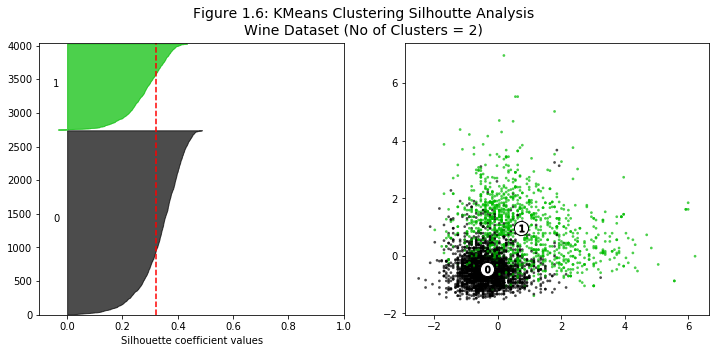

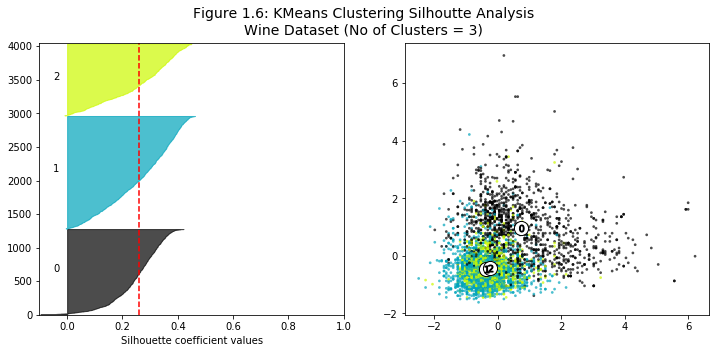

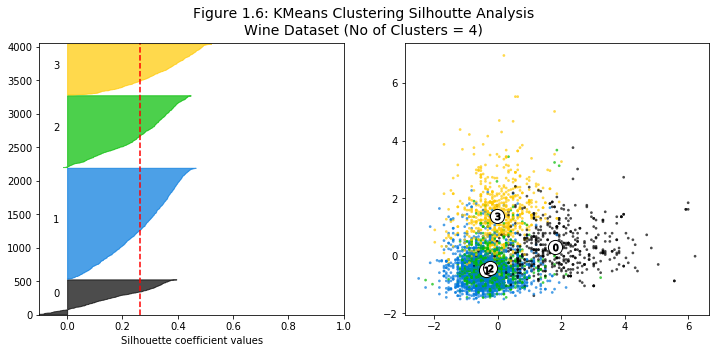

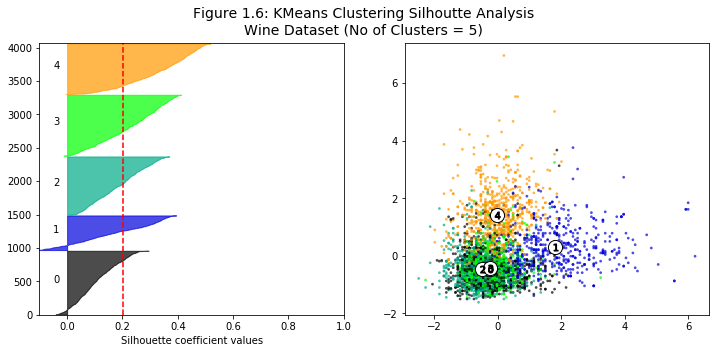

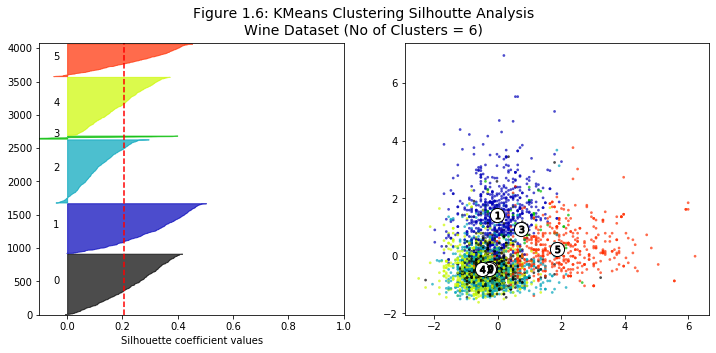

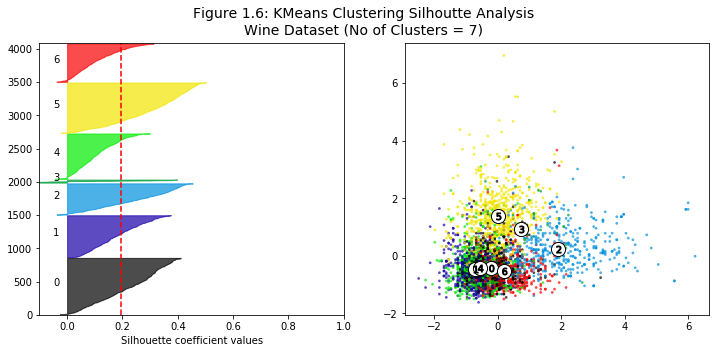

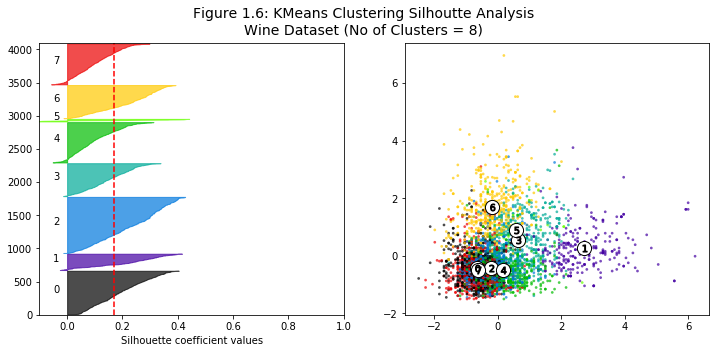

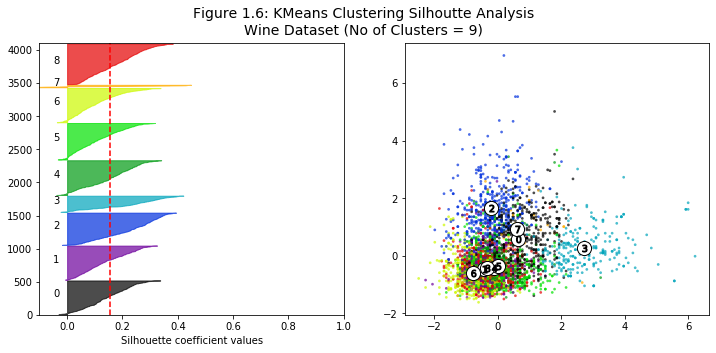

In [8]:
KM_Silhoutte(X_train, Y_train)

In [11]:
def compute_bic_score(X,title1, title2):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 10)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            print("CV Type: ", cv_type, " Components: ", n_components, " BIC Score: ", bic[-1])
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])

    print("Lowest BIC score = ", lowest_bic)
    # Plot the BIC scores
    plt.figure(figsize=(8, 6))
    clf = best_gmm
    bars = []
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title(title1)
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    #4splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    plt.show()
    plt.close()

CV Type:  spherical  Components:  1  BIC Score:  136621.35122210908
CV Type:  spherical  Components:  2  BIC Score:  124715.96442627348
CV Type:  spherical  Components:  3  BIC Score:  116802.44779361153
CV Type:  spherical  Components:  4  BIC Score:  112210.8523085644
CV Type:  spherical  Components:  5  BIC Score:  110478.93545663514
CV Type:  spherical  Components:  6  BIC Score:  109445.9060752689
CV Type:  spherical  Components:  7  BIC Score:  106425.24922694999
CV Type:  spherical  Components:  8  BIC Score:  106470.74911693724
CV Type:  spherical  Components:  9  BIC Score:  104566.77617098969
CV Type:  tied  Components:  1  BIC Score:  105406.55997642601
CV Type:  tied  Components:  2  BIC Score:  51153.50406081967
CV Type:  tied  Components:  3  BIC Score:  49741.247160140076
CV Type:  tied  Components:  4  BIC Score:  49232.656378013206
CV Type:  tied  Components:  5  BIC Score:  47779.455661091844
CV Type:  tied  Components:  6  BIC Score:  48571.03324866078
CV Type:  tied

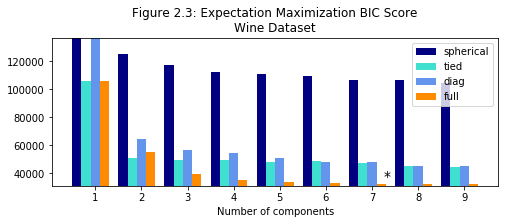

In [12]:
compute_bic_score(X_train, "Figure 2.3: Expectation Maximization BIC Score\nWine Dataset" , "Figure 2.4: Cluster Representation\nIncome Dataset")

## Part 2: Dimensionality Reduction (PCA, ICA, RP and SVD)

In [31]:
dimensions = range(1, 12)
ann_learning_rate = [0.35]
ann_hidden_layers = [(12)]

def run_ann(dimensions, classifier, X, Y):
    grid ={'clf__n_components':dimensions,'NN__learning_rate_init':ann_learning_rate,'NN__hidden_layer_sizes':ann_hidden_layers}      
    ann = MLPClassifier(activation='logistic',max_iter=2000,early_stopping=True,random_state=5)
    pipe = Pipeline([('clf',classifier),('NN',ann)])
    gs = GridSearchCV(pipe,grid,verbose=2,cv=5)
    gs.fit(X, Y)

    return (pd.DataFrame(gs.cv_results_) , gs.best_estimator_)


In [32]:
print('Part 2: PCA for Wines dataset')
pca = PCA(random_state = 5)
pca.fit_transform(X_train)
EVR = pd.Series(data = pca.explained_variance_ratio_,index = range(0,12))
EVR.to_csv('./P2/WinePCA-EVR.csv')
EV = pd.Series(data = pca.explained_variance_,index = range(0,12))
EV.to_csv('./P2/WinePCA-EV.csv')

pca = PCA(random_state = 5)  
nn_results, clf = run_ann(dimensions, pca, X_train, Y_train)     
nn_results.to_csv('./P2/WinePCA_ANN.csv')
test_score = clf.score(X_test, Y_test)

Part 2: PCA for Wines dataset
Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2, total=   0.1s
[CV] NN_

[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    7.5s finished


 0.8245264207377866
Best Estimator :  Pipeline(memory=None,
         steps=[('clf',
                 PCA(copy=True, iterated_power='auto', n_components=11,
                     random_state=5, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('NN',
                 MLPClassifier(activation='logistic', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=12, learning_rate='constant',
                               learning_rate_init=0.35, max_iter=2000,
                               momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=5, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         ve

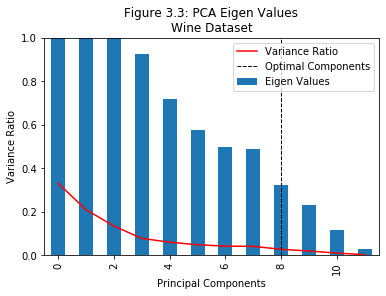

Reduced Dimension: 3 out of 12
Variance captured: 96.88427414983146 %


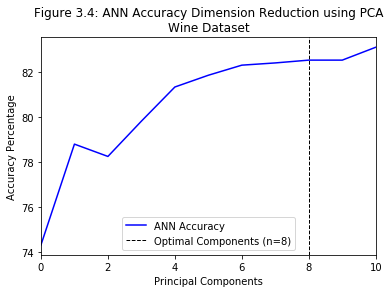

In [33]:
EVR.plot( ylim = (0.,0.35), color = 'red',  label = "Variance Ratio" )

ax = EV.plot(kind = 'bar',ylim = (0.,1.0),label = "Eigen Values")

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::2])
ax.xaxis.set_ticklabels(ticklabels[::2]);
ax.axvline(x = 8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Components")

plt.legend(loc=1)
plt.title("Figure 3.3: PCA Eigen Values\nWine Dataset")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio");
plt.show()
plt.close()

nn_pca = pd.read_csv("./P2/WinePCA_ANN.csv", header = 'infer')
nn_pca = nn_results['mean_test_score'] * 100.0
nn_pca.plot( color = 'blue',  label = "ANN Accuracy" )
plt.axvline(x = 8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Components (n=8)")
plt.legend(loc='best')
plt.title("Figure 3.4: ANN Accuracy Dimension Reduction using PCA\nWine Dataset")
plt.xlabel("Principal Components")
plt.ylabel("Accuracy Percentage");
plt.show()
plt.close()

In [35]:
ica = FastICA(random_state=5)
temp = ica.fit_transform(X_train)
order = [-abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]
temp = temp[:,np.array(order).argsort()]
kurt =  pd.Series([abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]);

ica = FastICA(random_state=5)  
nn_results , clf = run_ann(dimensions, ica, X_train, Y_train)     
nn_results.to_csv('./P2/WineICA_ANN.csv')
test_score = clf.score(X_test, Y_test)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2, total=   0.2s
[CV] NN_

[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    8.2s finished


 0.8035892323030908
Best Estimator :  Pipeline(memory=None,
         steps=[('clf',
                 FastICA(algorithm='parallel', fun='logcosh', fun_args=None,
                         max_iter=200, n_components=6, random_state=5,
                         tol=0.0001, w_init=None, whiten=True)),
                ('NN',
                 MLPClassifier(activation='logistic', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=12, learning_rate='constant',
                               learning_rate_init=0.35, max_iter=2000,
                               momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=5, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=

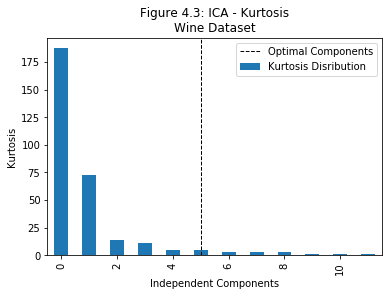

Reduced Dimension: 8 out of 12


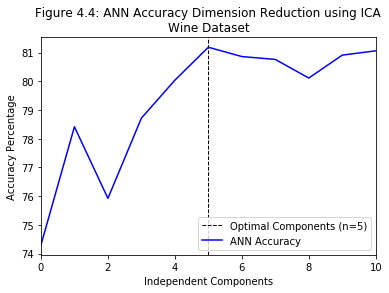

In [36]:
plt.figure(figsize=(6,4))
ax = kurt.plot(kind = 'bar', label = "Kurtosis Disribution");
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::2])
ax.xaxis.set_ticklabels(ticklabels[::2]);
ax.axvline(x=5 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Components")

plt.legend(loc='best')
plt.title("Figure 4.3: ICA - Kurtosis\nWine Dataset")
plt.xlabel("Independent Components")
plt.ylabel("Kurtosis");
plt.show()
plt.close()
print("Reduced Dimension: {} out of {}".format(X_train.shape[1]-len([i for i in kurt if i >= 8.]),
                                              X_train.shape[1]))
nn_ica = pd.read_csv("./P2/WineICA_ANN.csv", header = 'infer')
nn_ica = nn_results['mean_test_score'] * 100.0
plt.axvline(x=5 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Components (n=5)")
nn_ica.plot( color = 'blue',  label = "ANN Accuracy" )
plt.legend(loc='best')
plt.title("Figure 4.4: ANN Accuracy Dimension Reduction using ICA\nWine Dataset")
plt.xlabel("Independent Components")
plt.ylabel("Accuracy Percentage");
plt.show()
plt.close()

In [37]:
def distance_correlation (X1,X2):
    assert X1.shape[0] == X2.shape[0]
    return np.corrcoef(pairwise_distances(X1).ravel(),pairwise_distances(X2).ravel())[0,1]

In [38]:
tmp = defaultdict(dict)
for i,dim in product(range(10),dimensions):
    rp = SparseRandomProjection(random_state=i, n_components=dim)
    tmp[dim][i] = distance_correlation(rp.fit_transform(X_train), X_train)

tmp = pd.DataFrame(tmp).T
tmp.to_csv('./P2/WineRP_DistanceCorrelation.csv')

rp = SparseRandomProjection(random_state=5) 
nn_results, clf = run_ann(dimensions, rp,  X_train, Y_train)     
nn_results.to_csv('./P2/WineRP_ANN.csv')
test_score = clf.score(X_test, Y_test)


Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=1, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=2, total=   0.1s
[CV] NN_

[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=10, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, clf__n_components=11, total=   0.

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    7.8s finished


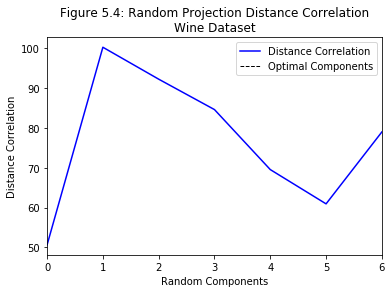

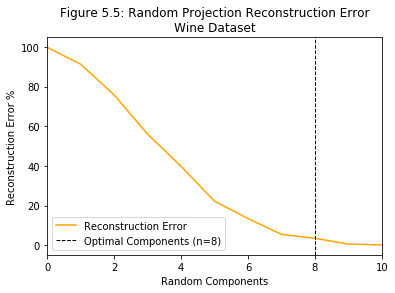

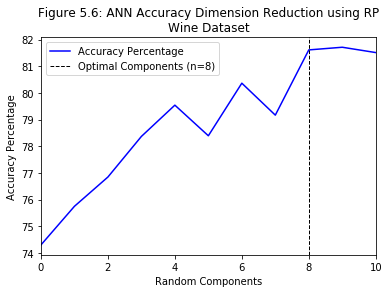

In [84]:
tmp['mean'] = tmp.mean(axis=1)

distance = tmp['mean']*100.0

distance.plot(color = 'blue',  label = "Distance Correlation" )
plt.axvline(x=8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Components")

plt.legend(loc='best')
plt.title("Figure 5.4: Random Projection Distance Correlation\nWine Dataset")
plt.xlabel("Random Components")
plt.ylabel("Distance Correlation");
plt.show()
plt.close()

rc_results = pd.read_csv("./P2/WineRP_Reconstruction.csv", header = 'infer')
rc_results = rc_results['Reconstruction'] * 100.0
rc_results.plot( color = 'orange',  label = "Reconstruction Error" )
plt.axvline(x=8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Components (n=8)")

plt.legend(loc='best')
plt.title("Figure 5.5: Random Projection Reconstruction Error\nWine Dataset")
plt.xlabel("Random Components")
plt.ylabel("Reconstruction Error %");
plt.show()
plt.close()

nn_results = pd.read_csv("./P2/WineRP_ANN.csv", header = 'infer')
nn_results = nn_results['mean_test_score'] * 100.0
nn_results.plot( color = 'blue',  label = "Accuracy Percentage" )
plt.axvline(x=8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Components (n=8)")

plt.legend(loc='best')
plt.title("Figure 5.6: ANN Accuracy Dimension Reduction using RP\nWine Dataset")
plt.xlabel("Random Components")
plt.ylabel("Accuracy Percentage");
plt.show()
plt.close()

In [21]:
class ImportanceSelect(BaseEstimator, TransformerMixin):
    def __init__(self, model, n=1):
         self.model = model
         self.n = n
    def fit(self, *args, **kwargs):
         self.model.fit(*args, **kwargs)
         return self
    def transform(self, X):
         return X[:,self.model.feature_importances_.argsort()[::-1][:self.n]]

In [23]:
rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=5, n_jobs=-1)

result = rfc.fit(X_train, Y_train).feature_importances_ 

tmp = pd.Series(np.sort(result)[::-1])
tmp.to_csv('./P2/WineRF_FI.csv')

In [24]:
ann_learning_rate = [0.35]
ann_hidden_layers = [(12)]

rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=5,n_jobs=-1)
filtr = ImportanceSelect(rfc)
grid ={'filter__n':dimensions,'NN__learning_rate_init':ann_learning_rate,'NN__hidden_layer_sizes':ann_hidden_layers}  
ann = MLPClassifier(activation='logistic',max_iter=2000,early_stopping=True,random_state=5)
pipe = Pipeline([('filter',filtr),('NN',ann)])
gs = GridSearchCV(pipe,grid,verbose=10,cv=5)
gs.fit(X_train, Y_train)
nn_results = pd.DataFrame(gs.cv_results_)
nn_results.to_csv('./P2/WineRF_ANN.csv')

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1, score=0.797, total=   3.0s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1, score=0.779, total=   0.5s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1, score=0.797, total=   0.9s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1, score=0.803, total=   0.7s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=1, score=0.805, total=   0.5s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2, score=0.793, total=   0.9s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.4s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2, score=0.772, total=   0.6s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2, score=0.805, total=   0.6s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2, score=0.808, total=   0.5s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=2, score=0.819, total=   0.8s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3, score=0.803, total=   0.6s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3, score=0.777, total=   0.6s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3, score=0.783, total=   0.6s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3, score=0.813, total=   0.7s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, filter__n=3, score=0.819, total=   0.9s
[CV] NN__hidden_la

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   40.9s finished


best estimator =  Pipeline(memory=None,
         steps=[('filter',
                 ImportanceSelect(model=RandomForestClassifier(bootstrap=True,
                                                               class_weight='balanced',
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_leaf=0.0,


<Figure size 864x576 with 0 Axes>

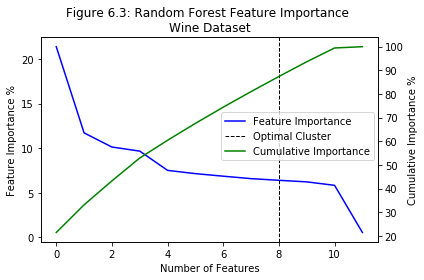

In [26]:
df1 = pd.read_csv("./P2/WineRF_FI.csv", header=None)
x_data = df1[0] 

plt.figure(figsize = (12,8))
fig, ax1 = plt.subplots()
ax1.plot(x_data, df1[1]* 100.0, label = "Feature Importance" , color = "blue",)
ax1.axvline(x=8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Cluster")

ax2 = ax1.twinx() 
ax2.plot(x_data, df1[2]*100.0, label = "Cumulative Importance" , color = "green",)
fig.legend(loc='center left', bbox_to_anchor=(0.5, 0.5))
plt.title("Figure 6.3: Random Forest Feature Importance \nWine Dataset")
ax1.set_xlabel("Number of Features")
ax1.set_ylabel("Feature Importance %")
ax2.set_ylabel("Cumulative Importance %")
fig.tight_layout() 
plt.show()
plt.close()

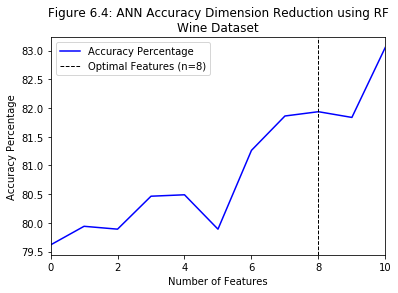

In [27]:
nn_results = pd.read_csv("./P2/WineRF_ANN.csv", header = 'infer')
nn_results = nn_results['mean_test_score'] * 100.0
#nn_train_results_pca = nn_results['mean_train_score'] * 100.0
nn_results.plot( color = 'blue',  label = "Accuracy Percentage" )
plt.axvline(x=8 , linestyle = "--", linewidth = 1, color = "k", label = "Optimal Features (n=8)")

plt.legend(loc='best')
plt.title("Figure 6.4: ANN Accuracy Dimension Reduction using RF\nWine Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Percentage");
plt.show()
plt.close()

clf = gs.best_estimator_
test_score = clf.score(X_test, Y_test)

## Part 3: Clustering after reducing dimensions

In [28]:
dimensions_PCA = 8 
dimensions_ICA = 5 
dimensions_RP = 8 
dimensions_RF = 8 

rfc = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', random_state =5, n_jobs = -1)

algo_name = ['PCA', 'ICA', 'RP', 'RF']

filter_ = ImportanceSelect(rfc,dimensions_RF)

algos = [PCA(n_components=dimensions_PCA,random_state=10), 
           FastICA(n_components=dimensions_ICA,random_state=10), 
           SparseRandomProjection(n_components=dimensions_RP,random_state=5),
           ImportanceSelect(rfc,dimensions_RF)]
SSE_dim = defaultdict(dict)

for i in range(len(algos)):
    if i == 3:
        X2 = algos[i].fit_transform(X_train, Y_train)
    elif i == 0:
        X2 = algos[i].fit_transform(X_train)
        
    else:   
        X2 = algos[i].fit_transform(X_train)
        
    data2 = pd.DataFrame(np.hstack((X2,np.atleast_2d(Y_train).T)))
    cols = list(range(data2.shape[1]))
    cols[-1] = 'Class'
    data2.columns = cols
    data2.to_hdf('datasets.hdf','Wine_'+algo_name[i],complib='blosc',complevel=9)

Index([0, 1, 2, 3, 4, 5, 6, 7, 'Class'], dtype='object')
For n_clusters = 2 The average silhouette_score is : 0.16528699156864615
For n_clusters = 3 The average silhouette_score is : 0.14219756114213514
For n_clusters = 4 The average silhouette_score is : 0.1694026703737654
For n_clusters = 5 The average silhouette_score is : 0.1806282213723333
For n_clusters = 6 The average silhouette_score is : 0.16853282154420246
For n_clusters = 7 The average silhouette_score is : 0.16229045342957968
For n_clusters = 8 The average silhouette_score is : 0.16378460254832078
For n_clusters = 9 The average silhouette_score is : 0.16697064247715585


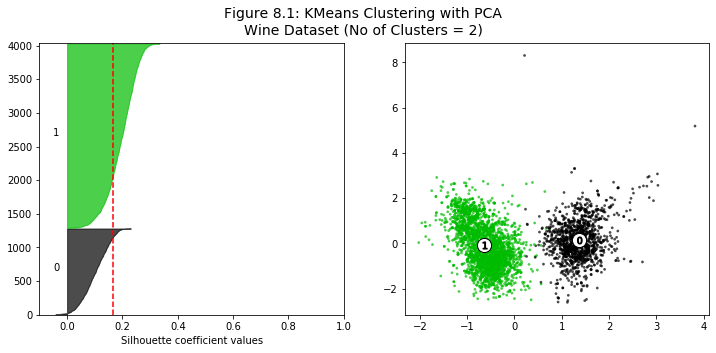

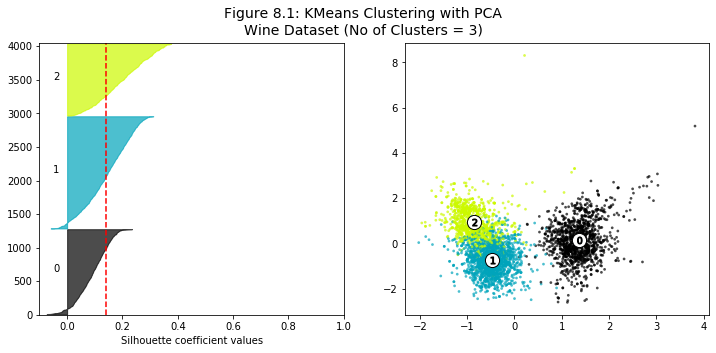

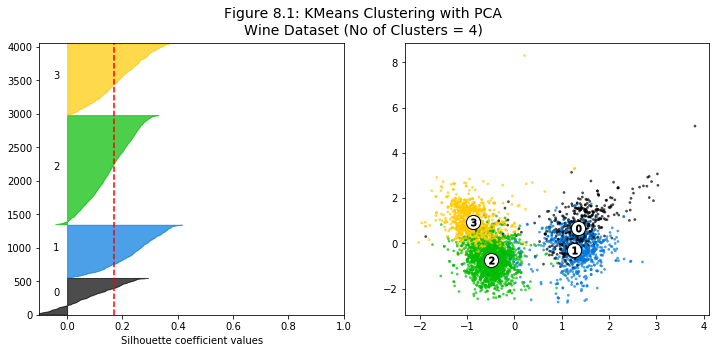

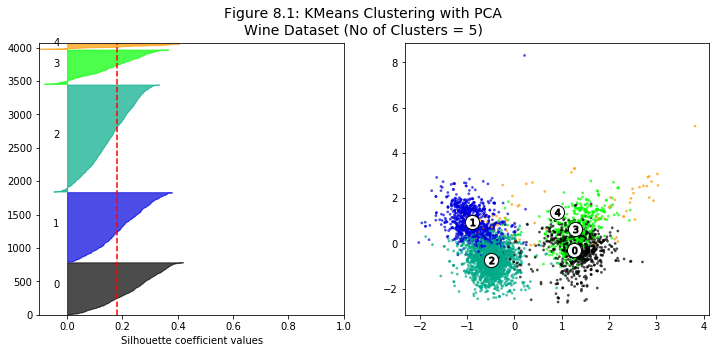

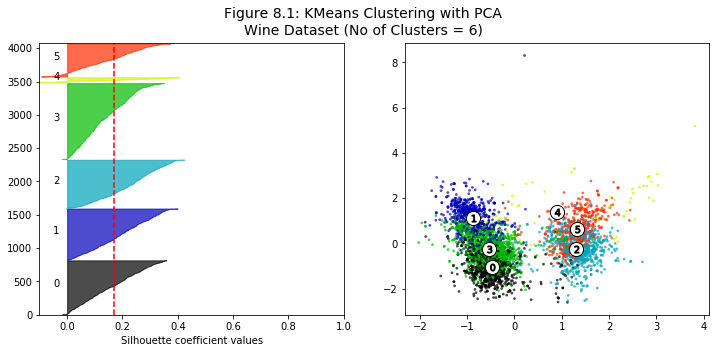

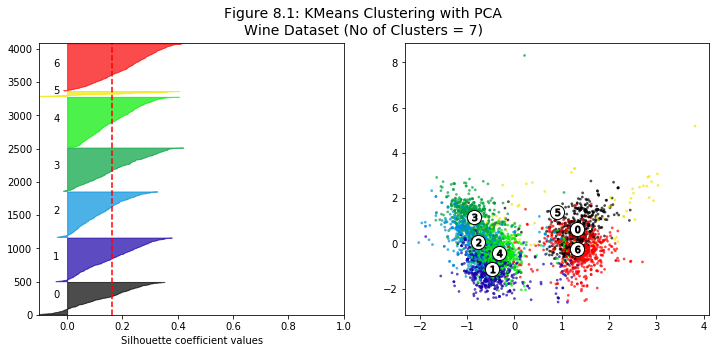

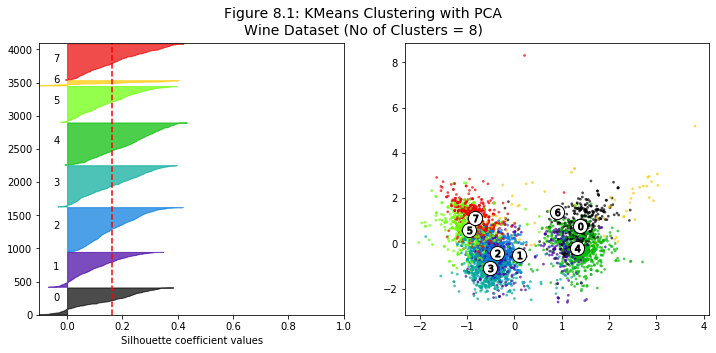

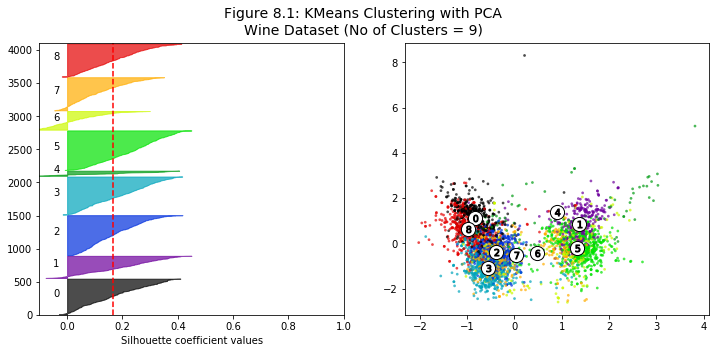

CV Type:  spherical  Components:  1  BIC Score:  91068.35468615015
CV Type:  spherical  Components:  2  BIC Score:  90001.65793513229
CV Type:  spherical  Components:  3  BIC Score:  87639.19976807814
CV Type:  spherical  Components:  4  BIC Score:  86652.57991820121
CV Type:  spherical  Components:  5  BIC Score:  85521.0067708359
CV Type:  spherical  Components:  6  BIC Score:  84702.84950353087
CV Type:  spherical  Components:  7  BIC Score:  84214.62522158623
CV Type:  spherical  Components:  8  BIC Score:  83371.48529465159
CV Type:  spherical  Components:  9  BIC Score:  82908.90515577687
CV Type:  tied  Components:  1  BIC Score:  91358.71635364693
CV Type:  tied  Components:  2  BIC Score:  90698.76822594997
CV Type:  tied  Components:  3  BIC Score:  85696.19559484292
CV Type:  tied  Components:  4  BIC Score:  84439.38221253213
CV Type:  tied  Components:  5  BIC Score:  85131.39751187051
CV Type:  tied  Components:  6  BIC Score:  81801.7874981491
CV Type:  tied  Components:

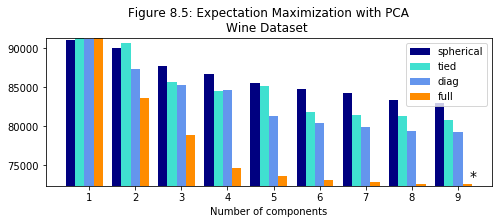

Index([0, 1, 2, 3, 4, 'Class'], dtype='object')
For n_clusters = 2 The average silhouette_score is : 0.24459287488054568
For n_clusters = 3 The average silhouette_score is : 0.22959109081866094
For n_clusters = 4 The average silhouette_score is : 0.27265898956640605
For n_clusters = 5 The average silhouette_score is : 0.2846742326325103
For n_clusters = 6 The average silhouette_score is : 0.2656344655978269
For n_clusters = 7 The average silhouette_score is : 0.24475666030269103
For n_clusters = 8 The average silhouette_score is : 0.2307716022157254
For n_clusters = 9 The average silhouette_score is : 0.21484362148837974


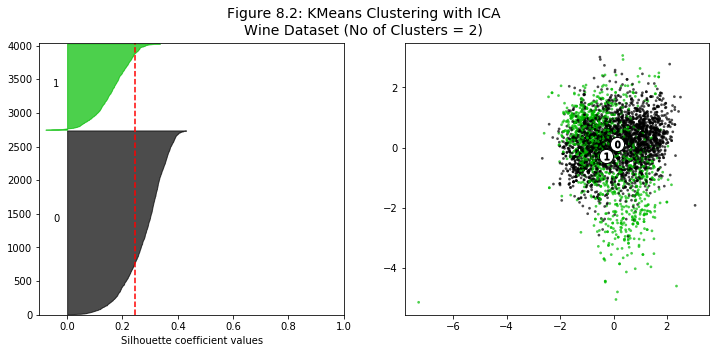

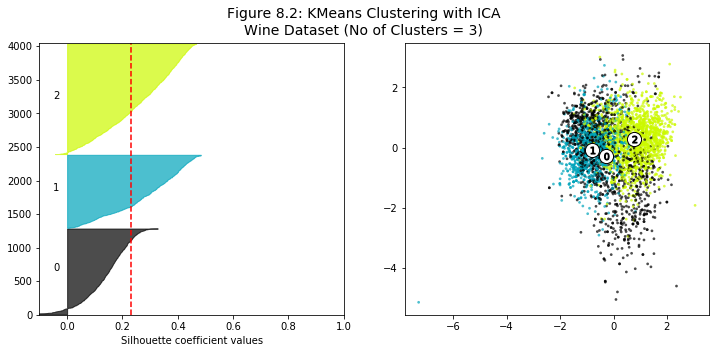

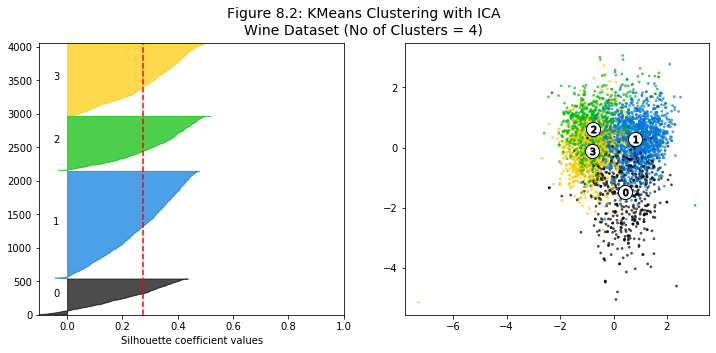

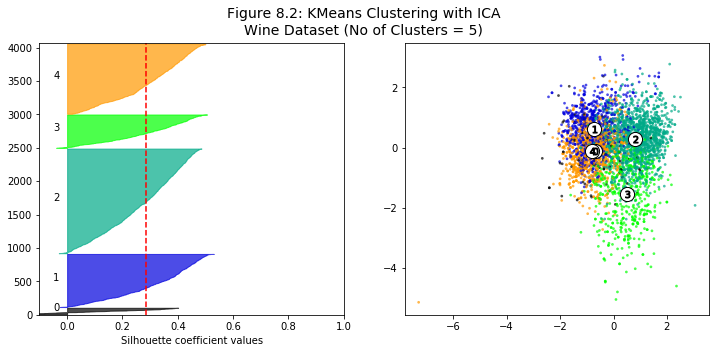

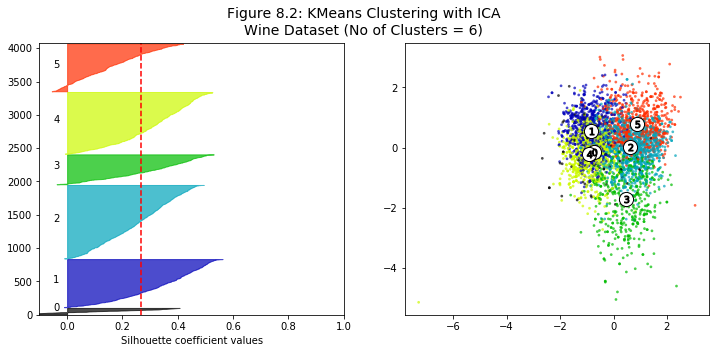

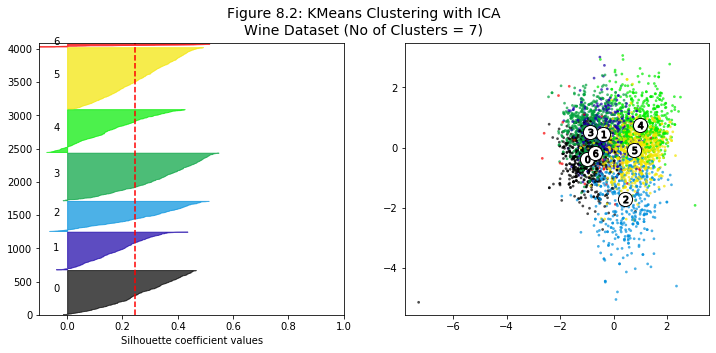

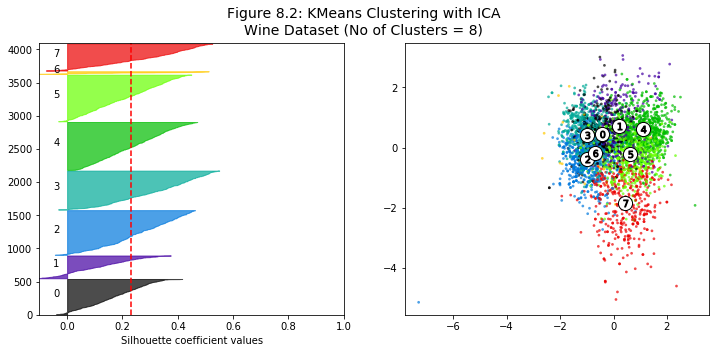

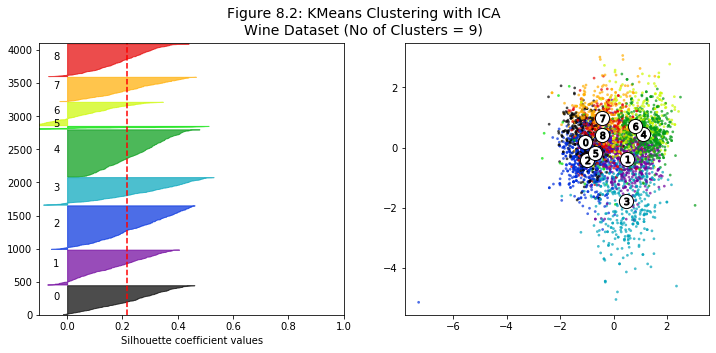

CV Type:  spherical  Components:  1  BIC Score:  56920.83269670989
CV Type:  spherical  Components:  2  BIC Score:  55566.679488448186
CV Type:  spherical  Components:  3  BIC Score:  54213.03062475584
CV Type:  spherical  Components:  4  BIC Score:  53047.25082262588
CV Type:  spherical  Components:  5  BIC Score:  52626.05281801052
CV Type:  spherical  Components:  6  BIC Score:  51617.30210177946
CV Type:  spherical  Components:  7  BIC Score:  51346.48175487115
CV Type:  spherical  Components:  8  BIC Score:  50789.11618741471
CV Type:  spherical  Components:  9  BIC Score:  50652.96025311754
CV Type:  tied  Components:  1  BIC Score:  57036.977363708604
CV Type:  tied  Components:  2  BIC Score:  53500.50845004856
CV Type:  tied  Components:  3  BIC Score:  52377.48391281998
CV Type:  tied  Components:  4  BIC Score:  51110.560327524145
CV Type:  tied  Components:  5  BIC Score:  49645.87779874054
CV Type:  tied  Components:  6  BIC Score:  49653.81982712479
CV Type:  tied  Compon

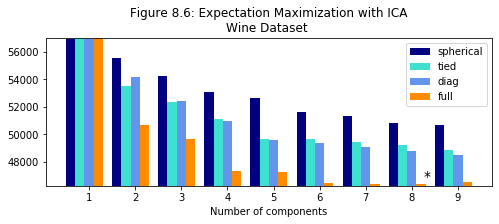

Index([0, 1, 2, 3, 4, 5, 6, 7, 'Class'], dtype='object')
For n_clusters = 2 The average silhouette_score is : 0.2906190699420059
For n_clusters = 3 The average silhouette_score is : 0.20754262203770144
For n_clusters = 4 The average silhouette_score is : 0.2160076720524603
For n_clusters = 5 The average silhouette_score is : 0.22105855470285807
For n_clusters = 6 The average silhouette_score is : 0.19905166068647004
For n_clusters = 7 The average silhouette_score is : 0.18841934023732443
For n_clusters = 8 The average silhouette_score is : 0.18244228610912475
For n_clusters = 9 The average silhouette_score is : 0.1799721197695927


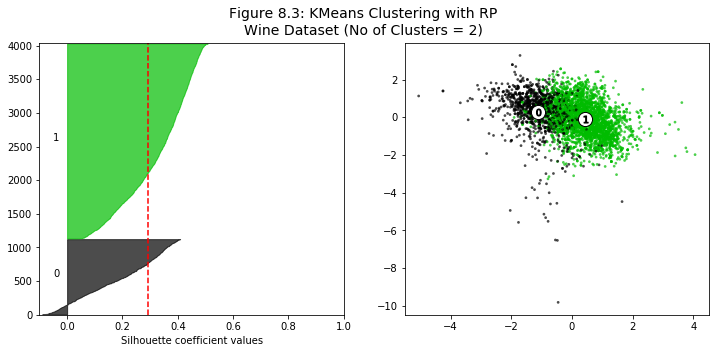

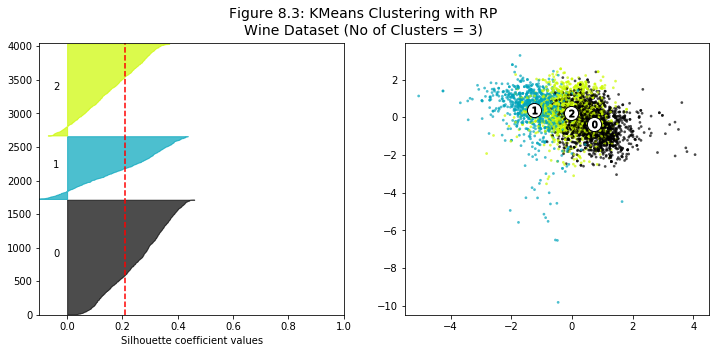

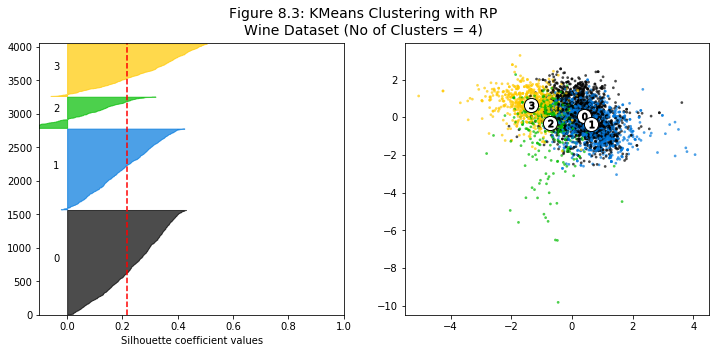

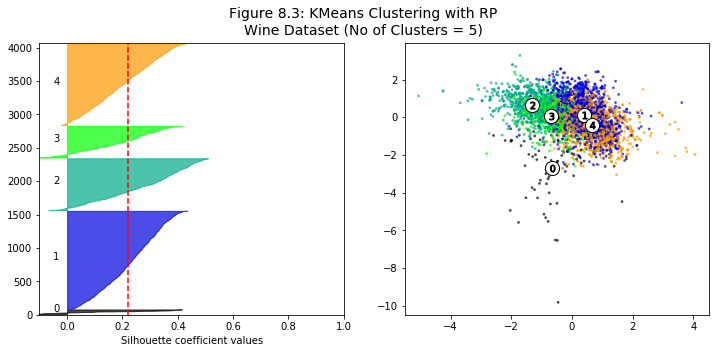

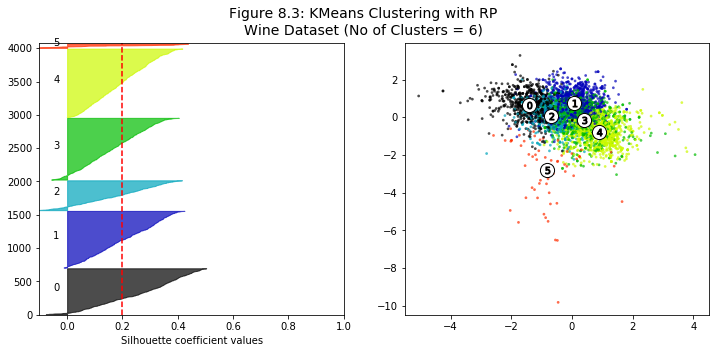

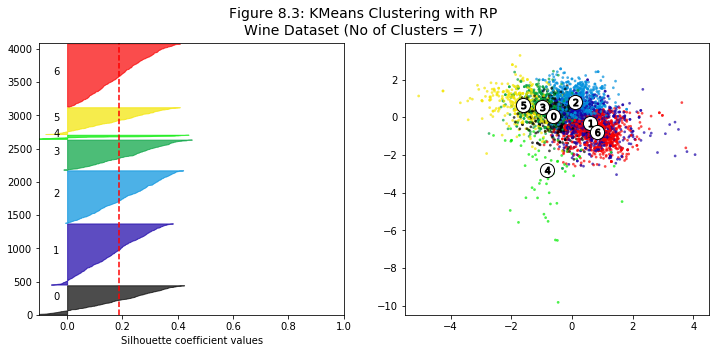

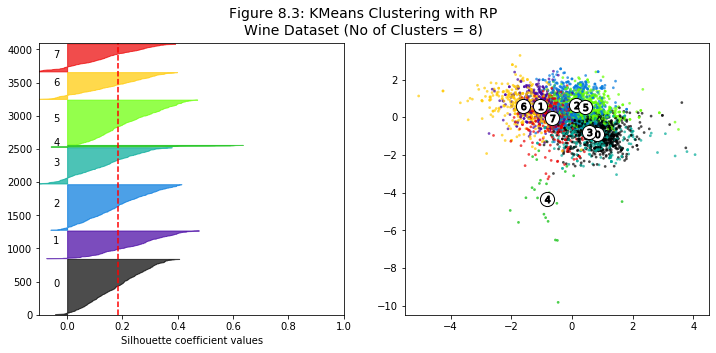

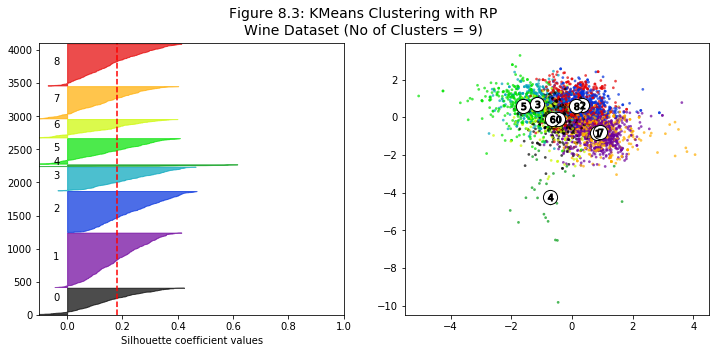

CV Type:  spherical  Components:  1  BIC Score:  91068.35468615015
CV Type:  spherical  Components:  2  BIC Score:  84110.59822201917
CV Type:  spherical  Components:  3  BIC Score:  81620.73628866022
CV Type:  spherical  Components:  4  BIC Score:  78580.40835381822
CV Type:  spherical  Components:  5  BIC Score:  76821.87092547763
CV Type:  spherical  Components:  6  BIC Score:  75208.0352653374
CV Type:  spherical  Components:  7  BIC Score:  74233.2789765017
CV Type:  spherical  Components:  8  BIC Score:  72964.7867858182
CV Type:  spherical  Components:  9  BIC Score:  72169.73176365506
CV Type:  tied  Components:  1  BIC Score:  60693.56693358735
CV Type:  tied  Components:  2  BIC Score:  59477.11224169613
CV Type:  tied  Components:  3  BIC Score:  59066.82151818322
CV Type:  tied  Components:  4  BIC Score:  57830.35484300175
CV Type:  tied  Components:  5  BIC Score:  56969.30250389248
CV Type:  tied  Components:  6  BIC Score:  54582.83422219357
CV Type:  tied  Components: 

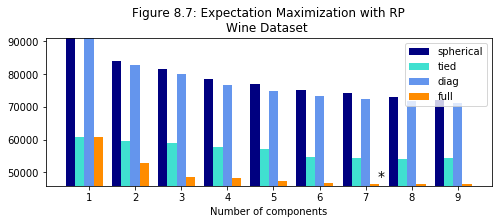

Index([0, 1, 2, 3, 4, 5, 6, 7, 'Class'], dtype='object')
For n_clusters = 2 The average silhouette_score is : 0.27947357594554645
For n_clusters = 3 The average silhouette_score is : 0.28346500779289896
For n_clusters = 4 The average silhouette_score is : 0.30112192307370855
For n_clusters = 5 The average silhouette_score is : 0.3028148387891958
For n_clusters = 6 The average silhouette_score is : 0.23815552442785506
For n_clusters = 7 The average silhouette_score is : 0.20935283661524232
For n_clusters = 8 The average silhouette_score is : 0.18538571550387442
For n_clusters = 9 The average silhouette_score is : 0.17619675740535662


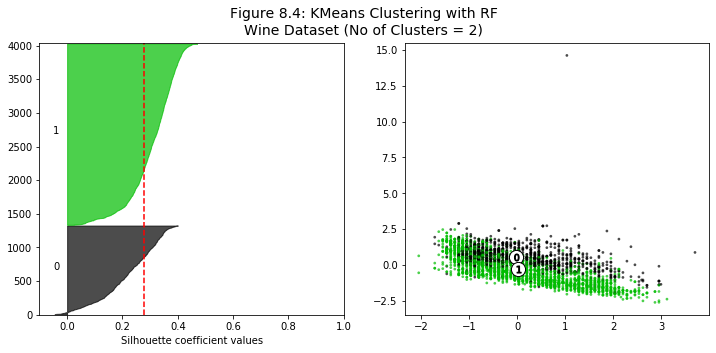

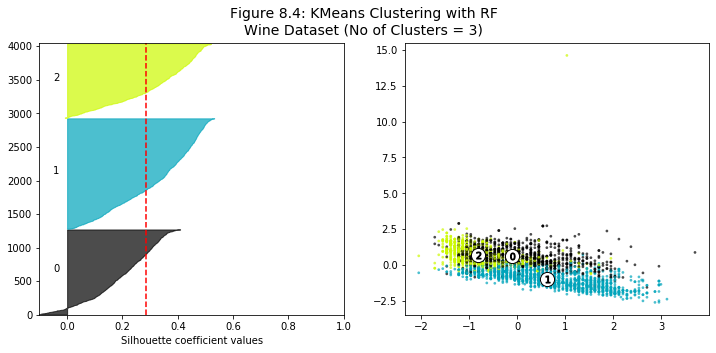

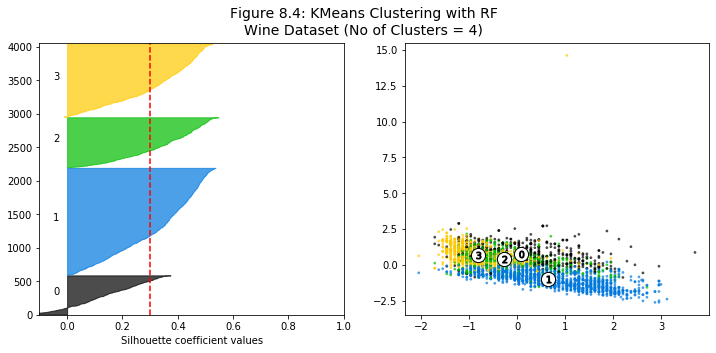

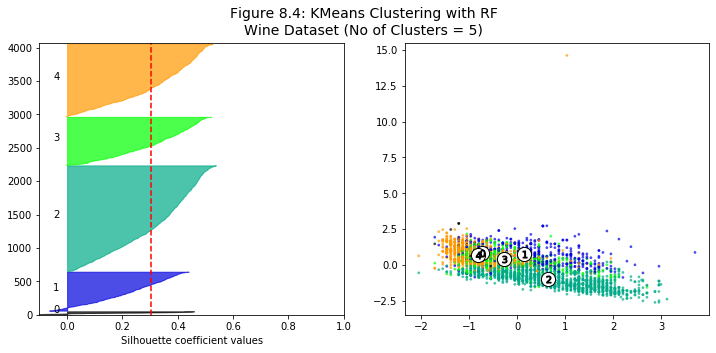

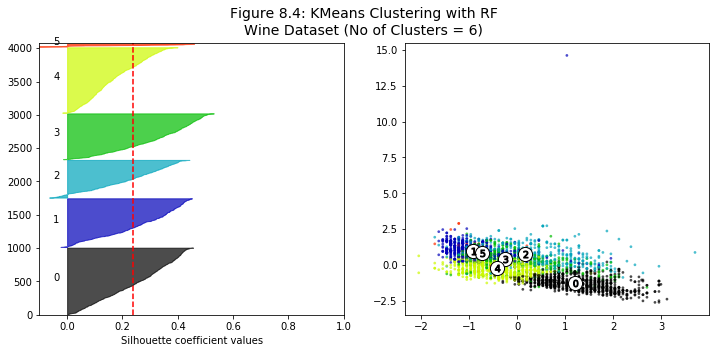

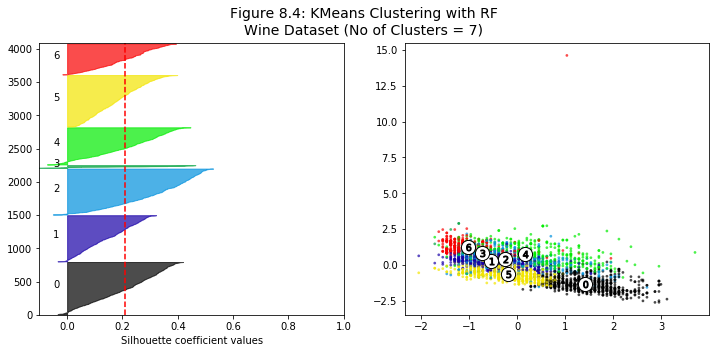

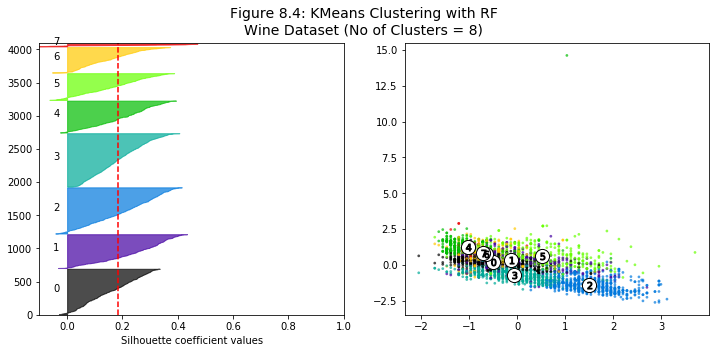

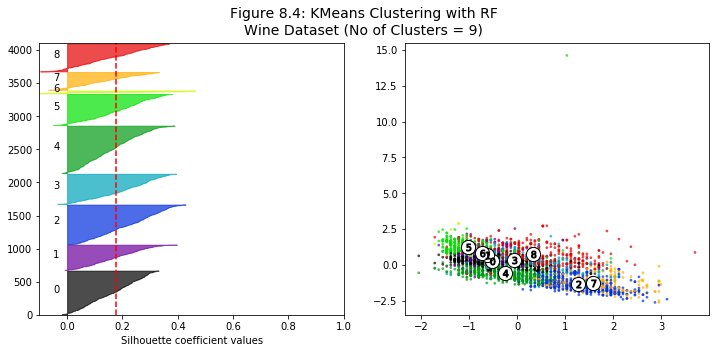

CV Type:  spherical  Components:  1  BIC Score:  91068.35468615015
CV Type:  spherical  Components:  2  BIC Score:  86125.8701177747
CV Type:  spherical  Components:  3  BIC Score:  79350.00970373518
CV Type:  spherical  Components:  4  BIC Score:  76586.0127143644
CV Type:  spherical  Components:  5  BIC Score:  74625.37012023837
CV Type:  spherical  Components:  6  BIC Score:  73844.02558090388
CV Type:  spherical  Components:  7  BIC Score:  71967.14119105134
CV Type:  spherical  Components:  8  BIC Score:  71250.16422694703
CV Type:  spherical  Components:  9  BIC Score:  71195.03587494661
CV Type:  tied  Components:  1  BIC Score:  78731.38371829243
CV Type:  tied  Components:  2  BIC Score:  78024.00298535223
CV Type:  tied  Components:  3  BIC Score:  73987.05375682327
CV Type:  tied  Components:  4  BIC Score:  73716.10903586185
CV Type:  tied  Components:  5  BIC Score:  72522.39281521847
CV Type:  tied  Components:  6  BIC Score:  71762.00041013314
CV Type:  tied  Components:

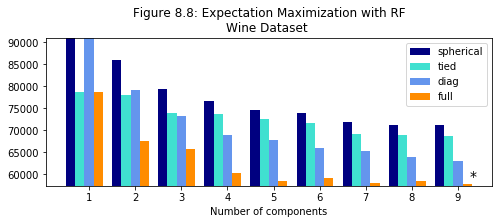

In [29]:
#random.seed(55)
titles = ["Figure 8.1: KMeans Clustering with PCA\nWine Dataset ",
          "Figure 8.2: KMeans Clustering with ICA\nWine Dataset ",
          "Figure 8.3: KMeans Clustering with RP\nWine Dataset ",
          "Figure 8.4: KMeans Clustering with RF\nWine Dataset "]

titles_bic_1 = ["Figure 8.5: Expectation Maximization with PCA\nWine Dataset ",
          "Figure 8.6: Expectation Maximization with ICA\nWine Dataset ",
          "Figure 8.7: Expectation Maximization with RP\nWine Dataset ",
          "Figure 8.8: Expectation Maximization with RF\nWine Dataset "]

titles_bic_2 = "Cluster Representation"

algo_name = ['PCA', 'ICA', 'RP', 'RF']
for i in range(len(algo_name)):
    # load datasets      
    temp = pd.read_hdf('datasets.hdf','Wine_'+algo_name[i]) 
    print(temp.columns)
    tempX = temp.drop('Class',1).copy().values
    tempY = temp['Class'].copy().values
    
    tempX = StandardScaler().fit_transform(tempX)
    
    KM_Silhoutte(tempX, tempY, titles[i])
    compute_bic_score(tempX , titles_bic_1[i], titles_bic_2)

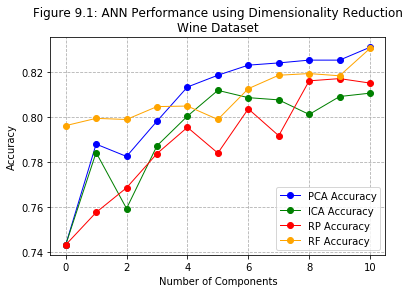

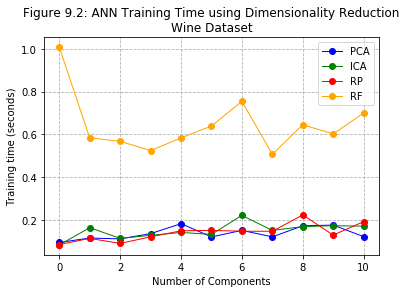

In [51]:
ann_pca = pd.read_csv("./P2/WinePCA_ANN.csv", header='infer')
ann_ica = pd.read_csv("./P2/WineICA_ANN.csv", header='infer')
ann_rp = pd.read_csv("./P2/WineRP_ANN.csv", header='infer')
ann_rf = pd.read_csv("./P2/WineRF_ANN.csv", header='infer')

plt.figure(figsize = (16,8))
plt.close()
x_data = ann_pca['Unnamed: 0']
plt.plot(x_data, ann_pca['mean_test_score'], 'o-', color = 'blue', linewidth = 1, label = "PCA Accuracy" )
plt.plot(x_data, ann_ica['mean_test_score'], 'o-', color = 'green', linewidth = 1, label = "ICA Accuracy" )
plt.plot(x_data, ann_rp['mean_test_score'], 'o-', color = 'red', linewidth = 1, label = "RP Accuracy" )
plt.plot(x_data, ann_rf['mean_test_score'], 'o-', color = 'orange', linewidth = 1, label = "RF Accuracy" )
plt.legend(loc = 4)
plt.title("Figure 9.1: ANN Performance using Dimensionality Reduction\nWine Dataset")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy");
plt.grid(True, linestyle = "--")
plt.show()
plt.close()


plt.close()
x_data = ann_pca['Unnamed: 0']
plt.plot(x_data, ann_pca['mean_fit_time'], 'o-', color = 'blue', linewidth = 1, label = "PCA" )
plt.plot(x_data, ann_ica['mean_fit_time'], 'o-', color = 'green', linewidth = 1, label = "ICA" )
plt.plot(x_data, ann_rp['mean_fit_time'], 'o-', color = 'red', linewidth = 1, label = "RP" )
plt.plot(x_data, ann_rf['mean_fit_time'], 'o-', color = 'orange', linewidth = 1, label = "RF" )
plt.legend(loc = 1)
plt.title("Figure 9.2: ANN Training Time using Dimensionality Reduction\nWine Dataset")
plt.xlabel("Number of Components")
plt.ylabel("Training time (seconds)");
plt.grid(True, linestyle = "--")
plt.show()
plt.close()


## Part 5: ANN on clustered data after reducing dimensions

In [54]:
class appendClusterDimKM(BaseEstimator, TransformerMixin):
    def __init__(self, cluster_algo, n_clusters = 8):
        self.cluster_algo = cluster_algo
        self.n_clusters = n_clusters
    def transform(self, X, *_):
        self.cluster_algo.set_params(n_clusters=self.n_clusters)
        self.cluster_algo.fit(X)
        returned_instances = pd.DataFrame(np.hstack((X,np.atleast_2d(self.cluster_algo.predict(X)).T)))
        return returned_instances
    def fit(self, *_):
        return self
  
  
class appendClusterDimGMM(BaseEstimator, TransformerMixin):
    def __init__(self, cluster_algo, n_clusters = 2):
        self.cluster_algo = cluster_algo
        self.n_clusters = n_clusters
        
    def transform(self, X, *_):
        self.cluster_algo.set_params(n_components=self.n_clusters)
        self.cluster_algo.fit(X)
        returned_instances = pd.DataFrame(np.hstack((X,np.atleast_2d(self.cluster_algo.predict(X)).T)))
        return returned_instances
    
    def fit(self, *_):
        return self


In [57]:
# Run NN on original dataset without cluster dimension for comparison
nn_arga = [(12)]
nn_lr = [.35]
algo_name = ['PCA', 'ICA', 'RP', 'RF', 'original']

grid ={'learning_rate_init':nn_lr,'hidden_layer_sizes':nn_arga}
mlp = MLPClassifier(max_iter=2000,early_stopping=True,random_state=5)
gs = GridSearchCV(mlp,grid,verbose=10,cv=5)
gs.fit(X_train, Y_train)
tmp = pd.DataFrame(gs.cv_results_)
tmp.to_csv('./P5/Wine_original.csv')
clf = gs.best_estimator_
print("Original classifier ", clf)
clusters = [2,3,4,5,6,7,8]

for i in range(len(algo_name)):
    if (i==4):
        tempX = X_train
        tempY = Y_train
    else:
        temp = pd.read_hdf('datasets.hdf','Wine_'+algo_name[i])    
        tempX = temp.drop('Class',1).copy().values
        tempY = temp['Class'].copy().values
     
    km = KMeans(random_state=5)
    gmm = GaussianMixture(random_state=5)

    grid ={'addClustKM__n_clusters':clusters,'NN__learning_rate_init':nn_lr,'NN__hidden_layer_sizes':nn_arga}
    mlp = MLPClassifier(max_iter=2000,early_stopping=True,random_state=5)
    pipe = Pipeline([('addClustKM',appendClusterDimKM(cluster_algo = km)),('NN',mlp)])
    gs = GridSearchCV(pipe,grid,verbose=10,cv=5)
    
    gs.fit(tempX,tempY)
    tmp = pd.DataFrame(gs.cv_results_)
    tmp.to_csv('./P5/WineKM_'+algo_name[i]+'.csv')
    
    grid ={'addClustGMM__n_clusters':clusters,'NN__learning_rate_init':nn_lr,'NN__hidden_layer_sizes':nn_arga}
    mlp = MLPClassifier(max_iter=2000,early_stopping=True,random_state=5)
    pipe = Pipeline([('addClustGMM',appendClusterDimGMM(cluster_algo = gmm)),('NN',mlp)])
    gs = GridSearchCV(pipe,grid,verbose=10,cv=5)
    
    gs.fit(tempX,tempY)
    tmp = pd.DataFrame(gs.cv_results_)
    tmp.to_csv('./P5/WineGMM_'+algo_name[i]+'.csv')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] hidden_layer_sizes=12, learning_rate_init=0.35 ..................
[CV]  hidden_layer_sizes=12, learning_rate_init=0.35, score=0.805, total=   0.1s
[CV] hidden_layer_sizes=12, learning_rate_init=0.35 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  hidden_layer_sizes=12, learning_rate_init=0.35, score=0.813, total=   0.2s
[CV] hidden_layer_sizes=12, learning_rate_init=0.35 ..................
[CV]  hidden_layer_sizes=12, learning_rate_init=0.35, score=0.824, total=   0.1s
[CV] hidden_layer_sizes=12, learning_rate_init=0.35 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  hidden_layer_sizes=12, learning_rate_init=0.35, score=0.820, total=   0.1s
[CV] hidden_layer_sizes=12, learning_rate_init=0.35 ..................
[CV]  hidden_layer_sizes=12, learning_rate_init=0.35, score=0.834, total=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


Original classifier  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=12, learning_rate='constant',
              learning_rate_init=0.35, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=5, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.792, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.814, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.817, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.734, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.826, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.789, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.797, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.807, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.800, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.829, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.808, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.800, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.803, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.784, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_cl

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    9.4s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.810, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.810, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.820, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.784, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.841, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.754, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.769, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.734, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.811, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.762, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.805, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.746, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.784, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.803, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClus

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    8.4s finished



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.772, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.788, total=   0.4s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.807, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.758, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.799, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.796, total=   0.2s

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.743, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.773, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.8s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.801, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.743, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.743, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.747, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.743, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.743, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.803, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_cl

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    9.6s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.772, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.743, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.796, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.815, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.743, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.793, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.753, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.796, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.772, total=   0.2s

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.804, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.791, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.776, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.796, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.1s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.744, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.744, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.746, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.792, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.799, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.763, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.756, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.6s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.743, total=   0.4s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.785, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.713, total=   0.4s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.789, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.772, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.751, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.784, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_cl

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   12.0s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.789, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.752, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.732, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.780, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.810, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.757, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.768, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.772, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.760, total=   0.2s

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.809, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.752, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.781, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.782, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    9.1s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.793, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.782, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.783, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.821, total=   0.2s

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.816, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.802, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.783, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.4s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.803, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.819, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.810, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.781, total=   0.5s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.783, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.776, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.755, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_cl

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    9.9s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.773, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.789, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.787, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.810, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.830, total=   0.2s

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.782, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.794, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.807, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.788, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.780, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.759, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.800, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.807, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.816, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.754, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClus

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    9.2s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.810, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.766, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.822, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.789, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=2, score=0.831, total=   0.2s

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.820, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.814, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.834, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.806, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=3, score=0.777, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.782, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.791, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.830, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_clusters=4, score=0.787, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustKM__n_cl

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   10.2s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.823, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.793, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.813, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.816, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=2, score=0.830, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.787, total=   0.1s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.779, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.818, total=   0.2s

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s



[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.805, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=3, score=0.764, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.794, total=   0.2s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.802, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.747, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4 
[CV]  NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClustGMM__n_clusters=4, score=0.787, total=   0.3s
[CV] NN__hidden_layer_sizes=12, NN__learning_rate_init=0.35, addClus

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   11.1s finished


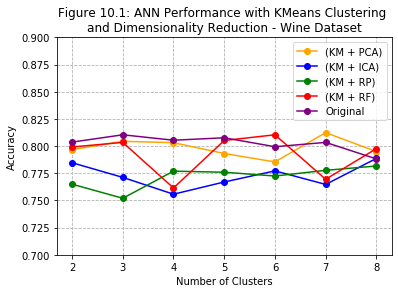

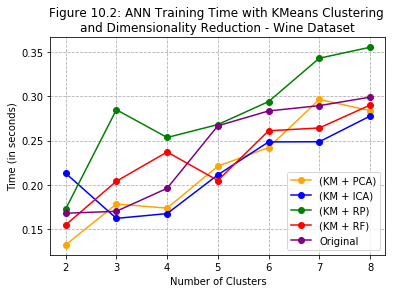

In [81]:
nn_results_km_pca = pd.read_csv("./P5/WineKM_PCA.csv", header='infer')
nn_results_km_ica  = pd.read_csv("./P5/WineKM_ICA.csv", header='infer')
nn_results_km_rp  = pd.read_csv("./P5/WineKM_RP.csv", header='infer')
nn_results_km_rf  = pd.read_csv("./P5/WineKM_RF.csv", header='infer')
nn_results_original = pd.read_csv("./P5/WineKM_original.csv", header='infer')


plt.ylim((0.7, 0.9))
clusters = [2,3,4,5,6,7,8]

nn_results_km_pca_results = nn_results_km_pca['mean_test_score']
nn_results_km_ica_results = nn_results_km_ica['mean_test_score']
nn_results_km_rp_results = nn_results_km_rp['mean_test_score']
nn_results_km_rf_results = nn_results_km_rf['mean_test_score']
nn_results_km_original_results = nn_results_original['mean_test_score'] 

plt.plot(clusters, nn_results_km_pca_results, marker = 'o', color = 'orange',  label = "(KM + PCA)" )
plt.plot(clusters, nn_results_km_ica_results, marker = 'o', color = 'blue',  label = "(KM + ICA)" )
plt.plot(clusters, nn_results_km_rp_results, marker = 'o', color = 'green',  label = "(KM + RP)" )
plt.plot(clusters, nn_results_km_rf_results, marker = 'o', color = 'red',  label = "(KM + RF)" )
plt.plot(clusters, nn_results_km_original_results, marker = 'o', color = 'purple',  label = "Original" )

plt.legend(loc='best')
plt.title("Figure 10.1: ANN Performance with KMeans Clustering \nand Dimensionality Reduction - Wine Dataset")
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy");
plt.grid(True, linestyle = "--")
plt.show()
plt.close()


nn_results_km_pca_time = nn_results_km_pca['mean_fit_time']
nn_results_km_ica_time = nn_results_km_ica['mean_fit_time']
nn_results_km_rp_time = nn_results_km_rp['mean_fit_time']
nn_results_km_rf_time = nn_results_km_rf['mean_fit_time']
nn_results_km_original_time = nn_results_original['mean_fit_time'] 

plt.plot(clusters, nn_results_km_pca_time, marker = 'o', color = 'orange',  label = "(KM + PCA)" )
plt.plot(clusters, nn_results_km_ica_time, marker = 'o', color = 'blue',  label = "(KM + ICA)" )
plt.plot(clusters, nn_results_km_rp_time, marker = 'o', color = 'green',  label = "(KM + RP)" )
plt.plot(clusters, nn_results_km_rf_time, marker = 'o', color = 'red',  label = "(KM + RF)" )
plt.plot(clusters, nn_results_km_original_time, marker = 'o', color = 'purple',  label = "Original" )

plt.legend(loc='best')
plt.title("Figure 10.2: ANN Training Time with KMeans Clustering \nand Dimensionality Reduction - Wine Dataset")
plt.xlabel("Number of Clusters")
plt.ylabel("Time (in seconds)");
plt.grid(True, linestyle = "--")
plt.show()
plt.close()


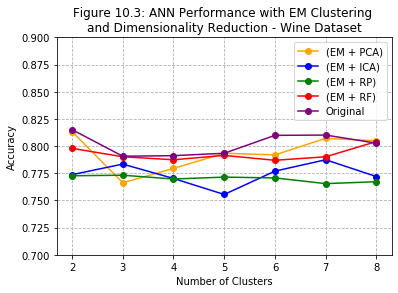

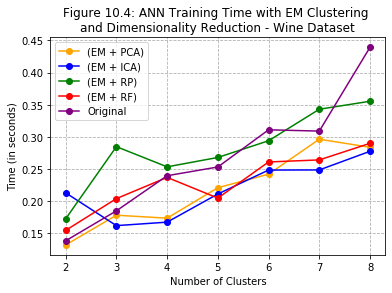

In [82]:
nn_results_gmm_pca = pd.read_csv("./P5/WineGMM_PCA.csv", header='infer')
nn_results_gmm_ica  = pd.read_csv("./P5/WineGMM_ICA.csv", header='infer')
nn_results_gmm_rp  = pd.read_csv("./P5/WineGMM_RP.csv", header='infer')
nn_results_gmm_rf  = pd.read_csv("./P5/WineGMM_RF.csv", header='infer')
nn_results_original = pd.read_csv("./P5/WineGMM_original.csv", header='infer')

plt.ylim((0.7, 0.9))
clusters = [2,3,4,5,6,7,8]

nn_results_gmm_pca_results = nn_results_gmm_pca['mean_test_score'] 
nn_results_gmm_ica_results = nn_results_gmm_ica['mean_test_score']
nn_results_gmm_rp_results = nn_results_gmm_rp['mean_test_score']
nn_results_gmm_rf_results = nn_results_gmm_rf['mean_test_score']
nn_results_gmm_original_results = nn_results_original['mean_test_score']

plt.plot(clusters, nn_results_gmm_pca_results, marker = 'o', color = 'orange',  label = "(EM + PCA)" )
plt.plot(clusters, nn_results_gmm_ica_results, marker = 'o', color = 'blue',  label = "(EM + ICA)" )
plt.plot(clusters, nn_results_gmm_rp_results, marker = 'o', color = 'green',  label = "(EM + RP)" )
plt.plot(clusters, nn_results_gmm_rf_results, marker = 'o', color = 'red',  label = "(EM + RF)" )
plt.plot(clusters, nn_results_gmm_original_results, marker = 'o', color = 'purple',  label = "Original" )

plt.legend(loc='best')
plt.title("Figure 10.3: ANN Performance with EM Clustering \nand Dimensionality Reduction - Wine Dataset")
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy");
plt.grid(True, linestyle = "--")
plt.show()
plt.close()

nn_results_gmm_pca_time = nn_results_km_pca['mean_fit_time']
nn_results_gmm_ica_time = nn_results_km_ica['mean_fit_time']
nn_results_gmm_rp_time = nn_results_km_rp['mean_fit_time']
nn_results_gmm_rf_time = nn_results_km_rf['mean_fit_time']
nn_results_gmm_original_time = nn_results_original['mean_fit_time'] 

plt.plot(clusters, nn_results_gmm_pca_time, marker = 'o', color = 'orange',  label = "(EM + PCA)" )
plt.plot(clusters, nn_results_gmm_ica_time, marker = 'o', color = 'blue',  label = "(EM + ICA)" )
plt.plot(clusters, nn_results_gmm_rp_time, marker = 'o', color = 'green',  label = "(EM + RP)" )
plt.plot(clusters, nn_results_gmm_rf_time, marker = 'o', color = 'red',  label = "(EM + RF)" )
plt.plot(clusters, nn_results_gmm_original_time, marker = 'o', color = 'purple',  label = "Original" )

plt.legend(loc='best')
plt.title("Figure 10.4: ANN Training Time with EM Clustering \nand Dimensionality Reduction - Wine Dataset")
plt.xlabel("Number of Clusters")
plt.ylabel("Time (in seconds)");
plt.grid(True, linestyle = "--")
plt.show()
plt.close()